In [368]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import hvplot.pandas
import montecarlo as mc
import seaborn as sns
import panel as pn
from panel.interact import interact
import random
from iexfinance.stocks import get_historical_data
import iexfinance as iex
from ta import *

import os
import json
from urllib.request import Request, urlopen

In [369]:
tickers_dict = {"index":["VOO"],
                "crypto":['BTC', 'ETH', 'XRP']}
years = 2
data_start_date = datetime.now() + timedelta(-365*years)

In [370]:
portfolio_hist_prices = mc.get_historic_data(ticker = tickers_dict["index"], 
                                             start_date = data_start_date)
#portfolio_hist_prices.head()

In [371]:
btc_daily_price = mc.get_crypto_daily_price(tickers_dict["crypto"],limit=years*365)
#btc_daily_price.head()

In [372]:
portfolio_hist_prices = pd.concat([portfolio_hist_prices,btc_daily_price],axis=1,join="inner")
portfolio_hist_prices.dropna(inplace=True)
portfolio_hist_prices = portfolio_hist_prices[(portfolio_hist_prices[portfolio_hist_prices.columns] != 0).all(axis=1)]
#portfolio_hist_prices.head()

In [373]:
portfolio_hist_prices = mc.normalize_dataframe(portfolio_hist_prices)
portfolio_daily_retn = portfolio_hist_prices.pct_change().copy()

#portfolio_daily_retn

In [374]:
def corr_plot(portfolio_daily_retn):
    
    title_font = {'family': 'monospace',
            'color':  'blue',
            'weight': 'bold',
            'size': 15,
            }
    correlated = portfolio_daily_retn.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(correlated, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Set up the matplotlib figure
    correlated_plot, ax = plt.subplots(figsize=(7,7))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(correlated, mask=mask, cmap="coolwarm", vmax=1, vmin =-1, center=0,
                square=True, linewidths=.5, annot=True
                #cbar_kws={"shrink": .5}
               )
    plt.title(f"Correlation Map of Portfolio\n",fontdict=title_font)
    ax.set_facecolor("aliceblue")
    
    #correlated_plot = sns.heatmap(correlated, vmin=-1, vmax=1, annot=True,cmap="coolwarm") 
    plt.close()
    return pn.Pane(correlated_plot)


<script async type="text/javascript" src="{{https://widgets.coingecko.com/coingecko-coin-price-marquee-widget.js}}">
</script>
<coingecko-coin-price-marquee-widget  coin-ids="bitcoin,ethereum,litecoin,ripple,zcash" currency="usd" background-color="#ffffff" locale="en">
</coingecko-coin-price-marquee-widget>


In [375]:
def get_corr_pane(portfolio_daily_retn):
    header_text = pn.panel(
        
    "<marquee> <bold>The latest news on crypto and finance here:</bold>&nbsp;<mar> BTC up 20,000.00% in last year, 7.77% today,&nbsp;"
    +" ETH up 400,000.00% in the last year, 9.99% today,&nbsp; "
    +" Trump lost re-election due to poor results,&nbsp; Global peace achieved yesterday at UN,&nbsp; "
    +" S&P500 down 10% in the last year, down 1.21%, today,&nbsp; "
    +"cryptocurrencies are being used more than dollar for international trading,&nbsp; XRP up 27.89% today,&nbsp; "
    +" Satoshi just gave away his millions of BTC to the most needed people in the developing world,&nbsp; "
    +" military war on drugs has been replaced by an educational war "
    +"on drugs and regulation of legal point of sales,&nbsp; drug cartels in bankruptcy, &nbsp;"
    +" Colombians achieved peace for first time in more than 60 years...&nbsp;</mar></marquee>", 
    align = "center"
    )

    side_text = pn.pane.Markdown(
'''
<style>

body {
    background-color: #FFFFFF;
}

mar {
  color: #006600;
  text-align: center;
  font-family: "Times New Roman", Times, serif;
  font-style: normal;
  font-size: 17px;
}

#leftbox {
    color: black;
}

bold{
    font-weight: bold;
    color: #003300;
    text-align: center;
    font-family: "Times New Roman", Times, serif;
    font-style: oblique;
    font-size: 24px;
    font-variant: small-caps;
}

p {
  color: #006600;
  font-size: 17px;
}

h1 {
    font-size: 30px;
    font-variant: small-caps;
    font-weight: bold;
    font-family: Arial, Helvetica, sans-serif;
}

h2 {
  color: #006600;
  font-family: Arial, Helvetica, sans-serif;
}

cr {
    font-size: 14px;
    font-style: italic;
    color: #33CCFF;
}
</style>
            
<div id="leftbox"> 
<h1>The Correlation Heat Map</h1>
</div>

<h2> The Formula </h2>

<img src= 'https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2009/11/pearsons.gif' height="260" width="550">
<br><cr>Image coutresy of<a href='https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/correlation-coefficient-formula/#Pearson'> Statistics How To</a></cr> 
<p> Correlation between sets of data is a measure of how well they are related. <br>
The most common measure of correlation in stats is the Pearson Correlation. <br>
The full name is the Pearson Product Moment Correlation (PPMC). It shows the <br>
linear relationship between two sets of data. In simple terms, it answers the <br> 
question, Can I draw a line graph to represent the data? </p>
''',
        align= "center",
        width_policy = "max",
    )
    
    lower_text = pn.pane.Markdown('''
<h2><bold>Important:</bold> Correlation does not imply causation!</h2>
        ''',
                                  align= "center",
                                  width_policy = "max",
                                 )###??????????
    #WARNING:param.Markdown11741: Setting non-parameter attribute
    #max_with=5 using a mechanism intended only for parameters
    left_row = pn.Row(side_text, align="start")
    middle_row = pn.Row(corr_plot(portfolio_daily_retn),align="center", width_policy="fit")
    both_row = pn.Row(left_row, middle_row)
    
    corr_pane = pn.Column(header_text,both_row,lower_text,align="center", sizing_mode='stretch_both')
    
    return corr_pane
    

Column(align='center', sizing_mode='stretch_both')
    [0] Markdown(str, align='center')
    [1] Row
        [0] Row
            [0] Markdown(str, align='center', width_policy='max')
        [1] Row(align='center', width_policy='fit')
            [0] Matplotlib(Figure)
    [2] Markdown(str, align='center', width_policy='max')
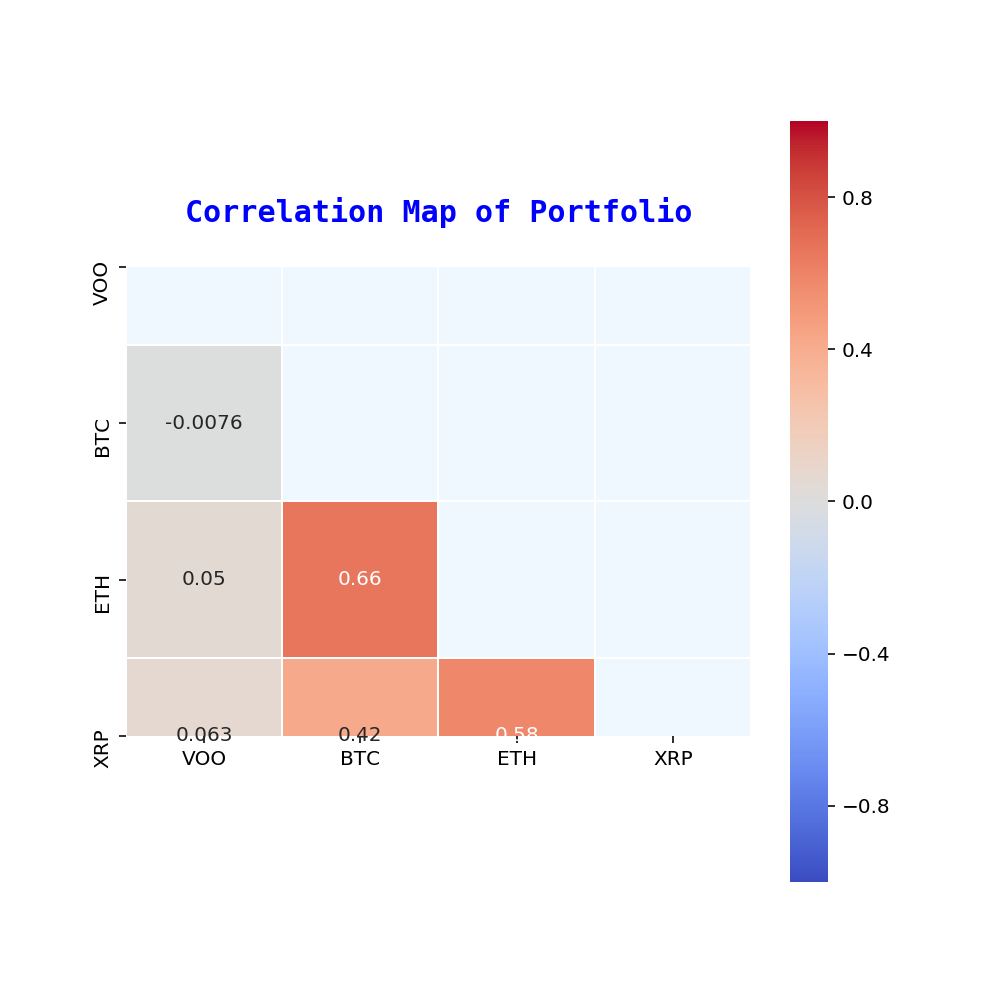

In [376]:
get_corr_pane(portfolio_daily_retn)

In [377]:
def sharp_rt_plot(portfolio_daily_retn):
    
    title_font = {'family': 'monospace',
            'color':  'blue',
            'weight': 'bold',
            'size': 15,
            }
    label_font = {'family': 'monospace',
            'color':  'green',
            'weight': 'bold',
            'size': 12,
            }
   # bar_colors=["orange","plum","yellowgreen","indigo","wheat","salmon","lightblue","purple","gold",
    #           "cornflowerblue","mediumslateblue","seagreen","peru"]
    bar_colors=["midnightblue","royalblue","indigo","darkcyan","darkgreen","maroon",
               "purple","darkorange","slategray","forestgreen"]

    sharp_ratios = portfolio_daily_retn.mean()*np.sqrt(252)/portfolio_daily_retn.std()
    
    sr_plot = plt.figure();
    plt.bar(x = sharp_ratios.index, height=sharp_ratios, color=random.sample(bar_colors,len(sharp_ratios.index)))
    plt.title(f"Sharp Ratios of Portfolio\n",fontdict=title_font)
    plt.ylabel("Sharp Ratio",fontdict=label_font)
    plt.xlabel("Assets",fontdict=label_font)
    plt.axhline(sharp_ratios.mean(), color='r')
    
    
    plt.close()
    return pn.Pane(sr_plot)

Matplotlib(Figure)
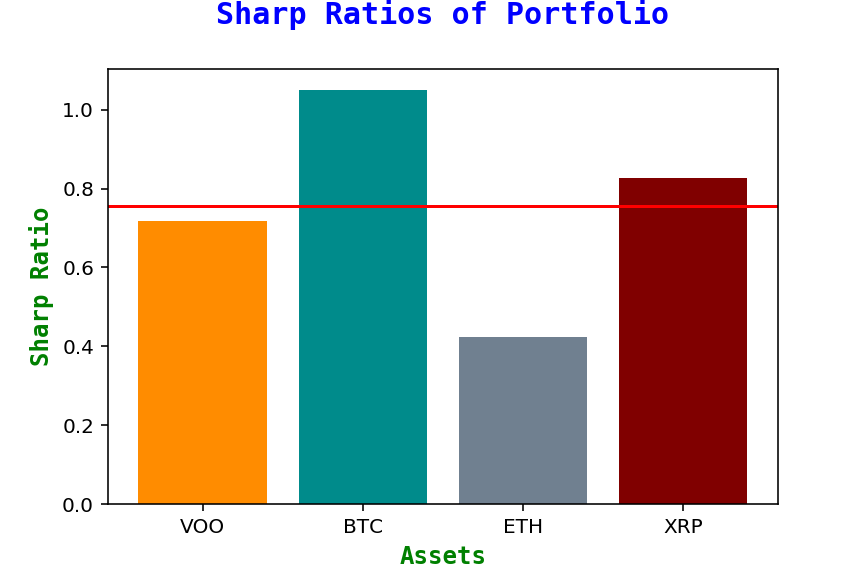

In [378]:
plot = sharp_rt_plot(portfolio_daily_retn)
plot

In [379]:


def plot_mont_carl(monte_carlo_sim):
    plot_title = f"Monte-Carlo Simulation of Portfolio"
    monte_carlo_sim_plot = monte_carlo_sim.hvplot(title=plot_title,figsize=(18,10),legend=False)
    return monte_carlo_sim_plot

In [380]:
def get_conf_interval(db,q=[0.05, 0.95]):
    confidence_interval = db.iloc[-1].quantile(q=q)
    return confidence_interval

In [381]:
def plot_conf(values=None,conf=[0,0]):
    bar_colors=["midnightblue","royalblue","indigo","black","darkcyan","darkgreen",
               "purple","darkorange","slategray"]
    conifidence_plot = plt.figure(figsize=(12,8));
    #plt.plot(values,kind='hist', density=True, bins=20)
    plt.hist(x = values,bins=20, color = random.choice(bar_colors))
    plt.axvline(conf.iloc[0], color='r')
    plt.axvline(conf.iloc[1], color='r')
    plt.close()
    return pn.Pane(conifidence_plot)

#### **New Code for TA functions**
_Christian_

---

In [382]:
def get_crypto_olhc(crypto_ticker, allData=False,limit = 90):
    """
    Returns a dataframe with all features needed for ta lib see
    https://technical-analysis-library-in-python.readthedocs.io/en/latest/ for more information about ta for python. 
    Arguments:
    cryptoticker: Crypto ticker in string format.
    allData: if True, gets all historical data available and ignores argument "limit".
    By default it is False.
    limit: the days from now to get the historical data. By default it's 90.
    """
    api_key = os.getenv("CC_API")

    if allData:
        url = f"https://min-api.cryptocompare.com/data/v2/histoday?fsym={crypto_ticker}&tsym=USD&allData=true&api_key={api_key}"
    else:
        url = f"https://min-api.cryptocompare.com/data/v2/histoday?fsym={crypto_ticker}&tsym=USD&limit={limit}&api_key={api_key}"

    raw_data = mc.read_json(url)
    crypto_df = pd.DataFrame(raw_data['Data']['Data'])
    crypto_df['time'] = pd.to_datetime(crypto_df['time'],unit='s')
    ta_df = add_all_ta_features(crypto_df, "open", "high", "low", "close", "volumefrom", fillna=True)      

    return ta_df

In [383]:
ta_df.fillna()
ta_df = get_crypto_olhc('ZEC', allData=False, limit=30)

C:\Users\cscat\Anaconda3\lib\site-packages\ta\trend.py:170: RuntimeWarning: divide by zero encountered in double_scalars
  dip[i] = 100 * (dip_mio[i]/trs[i])
C:\Users\cscat\Anaconda3\lib\site-packages\ta\trend.py:170: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (dip_mio[i]/trs[i])
C:\Users\cscat\Anaconda3\lib\site-packages\ta\trend.py:174: RuntimeWarning: divide by zero encountered in double_scalars
  din[i] = 100 * (din_mio[i]/trs[i])
C:\Users\cscat\Anaconda3\lib\site-packages\ta\trend.py:174: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (din_mio[i]/trs[i])
C:\Users\cscat\Anaconda3\lib\site-packages\ta\trend.py:176: RuntimeWarning: invalid value encountered in subtract
  dx = 100 * np.abs((dip - din) / (dip + din))


In [384]:
ta_df.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,volume_adi,...,momentum_mfi,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,others_dr,others_dlr,others_cr
0,2019-08-22,51.51,49.46,49.97,496190.40,25168083.16,50.72,multiply,BTC,65525.356455,...,100.000000,100.000000,79.830341,61.463415,61.463415,-38.536585,0.0,6.569788,0.000000,0.000000
1,2019-08-23,52.99,48.98,50.72,440900.01,22504697.17,51.04,multiply,BTC,125855.239844,...,100.000000,100.000000,65.433606,51.371571,56.417493,-48.628429,0.0,0.630915,0.628933,0.630915
2,2019-08-24,50.98,49.45,51.04,365029.80,18354956.52,50.28,multiply,BTC,43110.117912,...,72.179204,90.665942,63.222832,32.418953,48.417979,-67.581047,0.0,-1.489028,-1.500226,-0.867508
3,2019-08-25,51.14,50.03,50.28,366013.73,18378209.76,50.21,multiply,BTC,-216290.970403,...,56.381282,85.425182,58.312843,30.673317,38.154613,-69.326683,0.0,-0.139220,-0.139317,-1.005521
4,2019-08-26,53.16,50.10,50.21,586419.36,30232886.66,51.56,multiply,BTC,-274136.218246,...,67.895282,82.926659,55.942869,61.722488,41.604919,-38.277512,0.0,2.688707,2.653197,1.656151


In [385]:
def bb_plot(df):
    bb_plot = plt.figure(figsize=(12,8));
    plt.plot(df.close)
    plt.plot(df.volatility_bbh, label='High BB')
    plt.plot(df.volatility_bbl, label='Low BB')
    plt.plot(df.volatility_bbm, label='EMA BB')
    plt.title('Bollinger Bands')
    plt.legend()
    plt.close()
    return pn.Pane(bb_plot)

In [386]:
def ichi_plot(df):
    ichi_plot = plt.figure(figsize=(12,8));
    plt.plot(df.close)
    plt.plot(df.trend_ichimoku_a, label='Ichimoku a')
    plt.plot(df.trend_ichimoku_b, label='Ichimoku b')
    plt.title('Ichimoku Kinko Hyo')
    plt.legend()
    plt.close()
    return pn.Pane(ichi_plot)

In [387]:
def ema_plot(df):
    ema_plot = plt.figure(figsize=(12,8));
    plt.plot(df.close)
    plt.plot(df.volatility_bbm, label='EMA BB')
    plt.title('Exponential Moving Average')
    plt.legend()
    plt.close()
    return pn.Pane(ema_plot)

In [388]:
def macd_plot(df):
    macd_plot = plt.figure(figsize=(12,8));
    plt.plot(df.trend_macd, label='MACD');
    plt.plot(df.trend_macd_signal, label='MACD Signal')
    plt.plot(df.trend_macd_diff, label='MACD Difference')
    plt.title('MACD, MACD Signal and MACD Difference')
    plt.legend()
    plt.close()
    return pn.Pane(macd_plot)

#### End New Code for TA

---

# DASHBOARD TIME!!!

In [389]:
#print(portfolio_hist_prices.head())

In [390]:
portfolio_hist_prices = portfolio_hist_prices[(portfolio_hist_prices[portfolio_hist_prices.columns] != 0).all(axis=1)]
#portfolio_hist_prices.any()
#portfolio_hist_prices.head()

In [391]:
mc_sim = mc.monte_carlo_sim(portfolio_hist_prices,trials = 50)

In [392]:
risk_tabs = pn.Tabs(
    ("Correlation of portfolio",get_corr_pane(portfolio_daily_retn)),
    ("Sharp Ratios", sharp_rt_plot(portfolio_daily_retn)),
#    background="whitesmoke"
)

In [393]:
montecarlo_tabs = pn.Tabs(
    ("monte Carlo Simulation",plot_mont_carl(mc_sim)),
    ("Confidence Intervals", plot_conf(mc_sim.iloc[-1],get_conf_interval(mc_sim))),
#    background="whitesmoke"
)

In [394]:
techl_analysis_tabs = pn.Tabs(
    ("Exp. Moving Avg.",ema_plot(ta_df)),
    ("Bollinger Bands", bb_plot(ta_df)),
    ("MACD",macd_plot(ta_df)),
    ("Ichimoku Kinkō Hyō", ichi_plot(ta_df)),
#    background="whitesmoke"
)

In [395]:
tabs = pn.Tabs(
    ("Risk",risk_tabs),
    ("Monte Carlo Simulation", montecarlo_tabs),
    ("Tecnical Analysis", techl_analysis_tabs),
    ("Report", "in construction"),
    tabs_location = "left",
    align = "start"
)
  

In [396]:
  
panel = tabs

panel.show()